# AutoEQ - Mimic other headphones on the fly with Equalizer APO

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

import pandas as pd

from drc.sound import Sound
from drc.tuners.response.equalizer import ResponseEqualizer
from drc.measurements.frequency.responses import FrequencyResponse
from drc.filters.peq import PEQs

# Utilities

In [3]:
def probe_channels(wait_sec = 2): 
    fr, _ = probe()        
    fr.plot_graph(raw_plot_kwargs= {'color': 'green', 'alpha': 0.5},
                  smoothed_plot_kwargs= {'color': 'red', 'alpha': 0.5});

# Which headphones are you using?
## Read frequency response from csv file

In [4]:
model_name = 'KZ_EDR1'
model_name = 'QKZ_DM1'
model_name = 'Apple EarPods'
model_name = 'QCY_QS2'
# model_name = 'Mi_NDZ_03_GB'
# model_name = 'NB speaker'
model_name = 'Beats Pro'
# model_name = 'Racoon speakers'
# model_name = 'JamBox'

In [5]:
compensation_name = 'harman_over-ear_2018'
# compensation_name = 'flat'

fn_from = f'results/{model_name} to {compensation_name} measurement.csv'
fr_from = FrequencyResponse.read_from_csv(fn_from)

## Read frequency response from the Web

In [6]:
# model_name_to = 'Beats Pro'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beats%20Pro/Beats%20Pro.csv'

## Plot

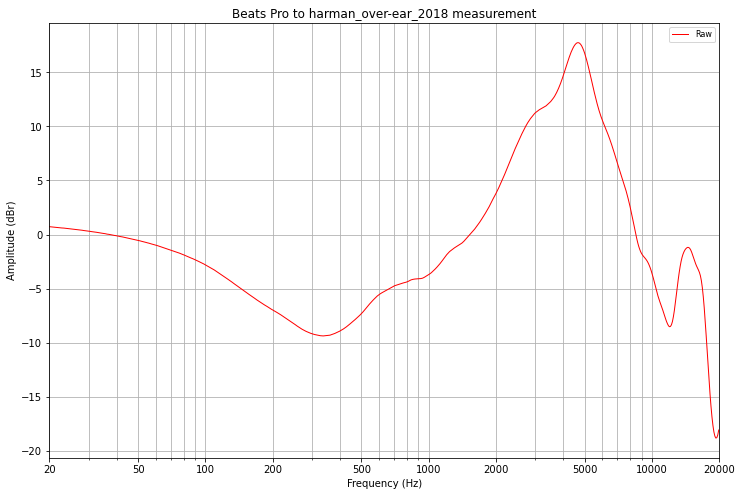

In [7]:
fr_from.reset()
fr_from.plot_graph(raw_plot_kwargs={'color': 'red'});

# Compensation from csv file

In [17]:
compensation_name = 'flat'
compensation_path = 'compensation/zero.csv'

# compensation_name = 'harman_over-ear_2013'
# compensation_path = 'compensation/harman_over-ear_2013.csv'

compensation_name = 'harman_over-ear_2018'
compensation_path = 'compensation/harman_over-ear_2018.csv'

compensation = FrequencyResponse.read_from_csv(compensation_path)
compensation.name = compensation_name

# Other headphones as compensation (target)
### Read frequency response from the Web
https://github.com/jaakkopasanen/AutoEq/tree/master/results  
https://github.com/jaakkopasanen/AutoEq/tree/master/measurements

In [19]:
compensation_name = 'Audeze LCD-X'
url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Audeze%20LCD-X/Audeze%20LCD-X.csv'

# compensation_name = 'Beats Pro'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beats%20Pro/Beats%20Pro.csv'

# compensation_name = 'AKG K371'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/AKG%20K371/AKG%20K371.csv'

# compensation_name = 'Sennheiser HD650'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20650/Sennheiser%20HD%20650.csv'

compensation_name = 'Sennheiser HD600'
url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/Sennheiser%20HD%20600/Sennheiser%20HD%20600.csv'

# compensation_name = 'Sennheiser HD560S'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# compensation_name = 'Sennheiser HD6XX'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/Sennheiser%20HD%206XX/Sennheiser%20HD%206XX.csv'

# compensation_name = 'AKG K701'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/AKG%20K701/AKG%20K701.csv'

compensation_name = 'Beyerdynamic DT880'
url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beyerdynamic%20DT%20880%20250%20Ohm/Beyerdynamic%20DT%20880%20250%20Ohm.csv'

# compensation_name = 'AKG N400'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_in-ear_2019v2/AKG%20N400/AKG%20N400.csv'

# compensation_name = 'PSB M4U 8'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_over-ear_2018/PSB%20M4U%208/PSB%20M4U%208.csv'

# compensation_name = 'Sony MDR-7506'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/oratory1990/harman_over-ear_2018/Sony%20MDR-7506/Sony%20MDR-7506.csv'


compensation = FrequencyResponse.read_csv_from_url(url_measurement)
compensation.name = compensation_name

## Plot

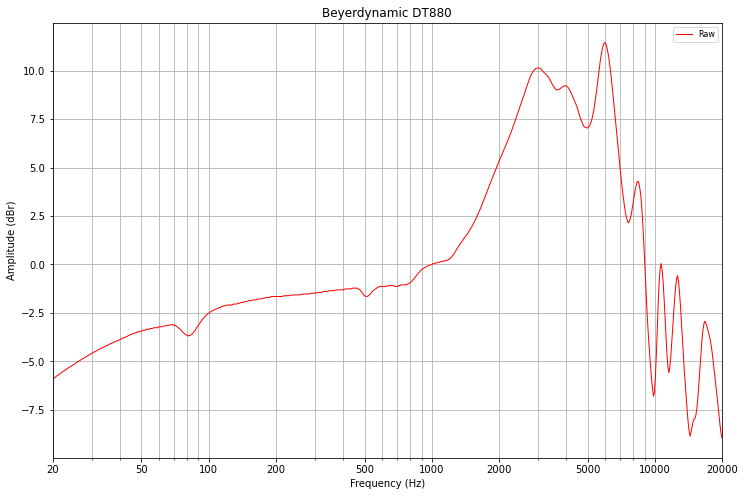

In [20]:
compensation.reset()
compensation.plot_graph(raw_plot_kwargs={'color': 'red'});

# Calculate PEQ coefficients 

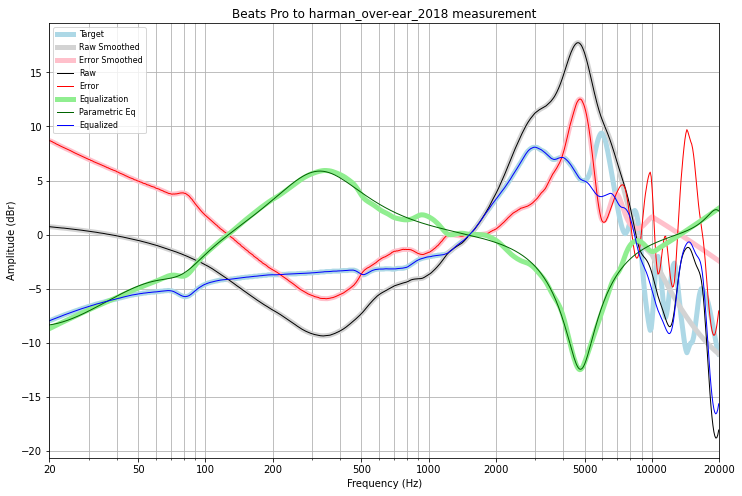

In [21]:
import time

n_filters = 10
# n_filters = [5, 5]
max_gain_dB = 12
bass_boost_gain = 0

compensation.reset()
measurement, peqs, n_peq_filters, peq_max_gains = \
    ResponseEqualizer.get_peq_filters(fr_from,
                                      compensation = compensation,
                                      max_filters = n_filters,
                                      max_gain_dB = max_gain_dB,
                                      bass_boost_gain = bass_boost_gain) 
measurement.plot_graph();

# PEQ settings

In [12]:
pd.DataFrame(peqs.param_sets)

,type,freq_Hz,gain_dB,Q
0,PK,17.974232,-8.421380,0.394374
1,PK,78.629372,-1.924014,1.503257
2,PK,321.321045,6.137130,0.775682
3,PK,4794.959473,-12.533934,1.879209
4,PK,19383.648438,2.353798,0.844718


# Write for Equalizer APO

In [13]:
fn_equalizer_apo_peq_settings = ['..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', 'Softwares', 'EqualizerAPO', 'config', 'filters', 'X.txt']
fn_equalizer_apo_peq_settings = Pathfinder.abs_path_from_relative(fn_equalizer_apo_peq_settings)
peqs.dump(fn_equalizer_apo_peq_settings)

print(f'X : {model_name} ==> {compensation_name}')

X : Beats Pro ==> Beyerdynamic DT880
